# Deep Learning Models for the Wine Quality Dataset

**Report Contents**
1. Data description
2. Objective of the analysis
3. EDA and feature engineering
4. Deep learning models to predict _quality_
5. Deep learning models to predict _color_
6. Findings and suggestions

### 1. Data description

The [_dataset_](https://archive.ics.uci.edu/ml/datasets/wine+quality) includes physicochemical test results and also rating by wine experts for different kinds of red and white wine.

Here are the features:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (score between 0 and 10)
13. color (red and white)

### 2. Objective of the analysis

It is aimed to predict the quality and also the color of the wines with separate deep learning models.

### 3. EDA and feature engineering

Let's start to explore the features.

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import pandasql as ps
%matplotlib inline

In [140]:
data = pd.read_csv("data/Wine_Quality_Data.csv")
data.head().T

,0,1,2,3,4
fixed_acidity,7.4,7.8,7.8,11.2,7.4
volatile_acidity,0.7,0.88,0.76,0.28,0.7
citric_acid,0.0,0.0,0.04,0.56,0.0
residual_sugar,1.9,2.6,2.3,1.9,1.9
chlorides,0.076,0.098,0.092,0.075,0.076
free_sulfur_dioxide,11.0,25.0,15.0,17.0,11.0
total_sulfur_dioxide,34.0,67.0,54.0,60.0,34.0
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.51,3.2,3.26,3.16,3.51
sulphates,0.56,0.68,0.65,0.58,0.56


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Null values do not exist. Let's examine the correlations between the features.

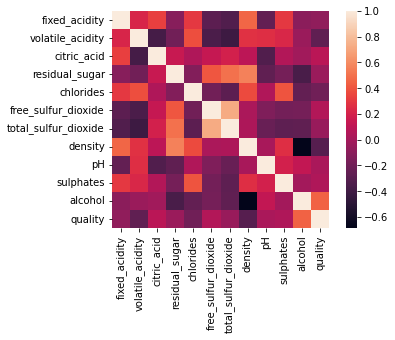

In [142]:
corrmat = data.corr()
sns.heatmap(corrmat, square=True);

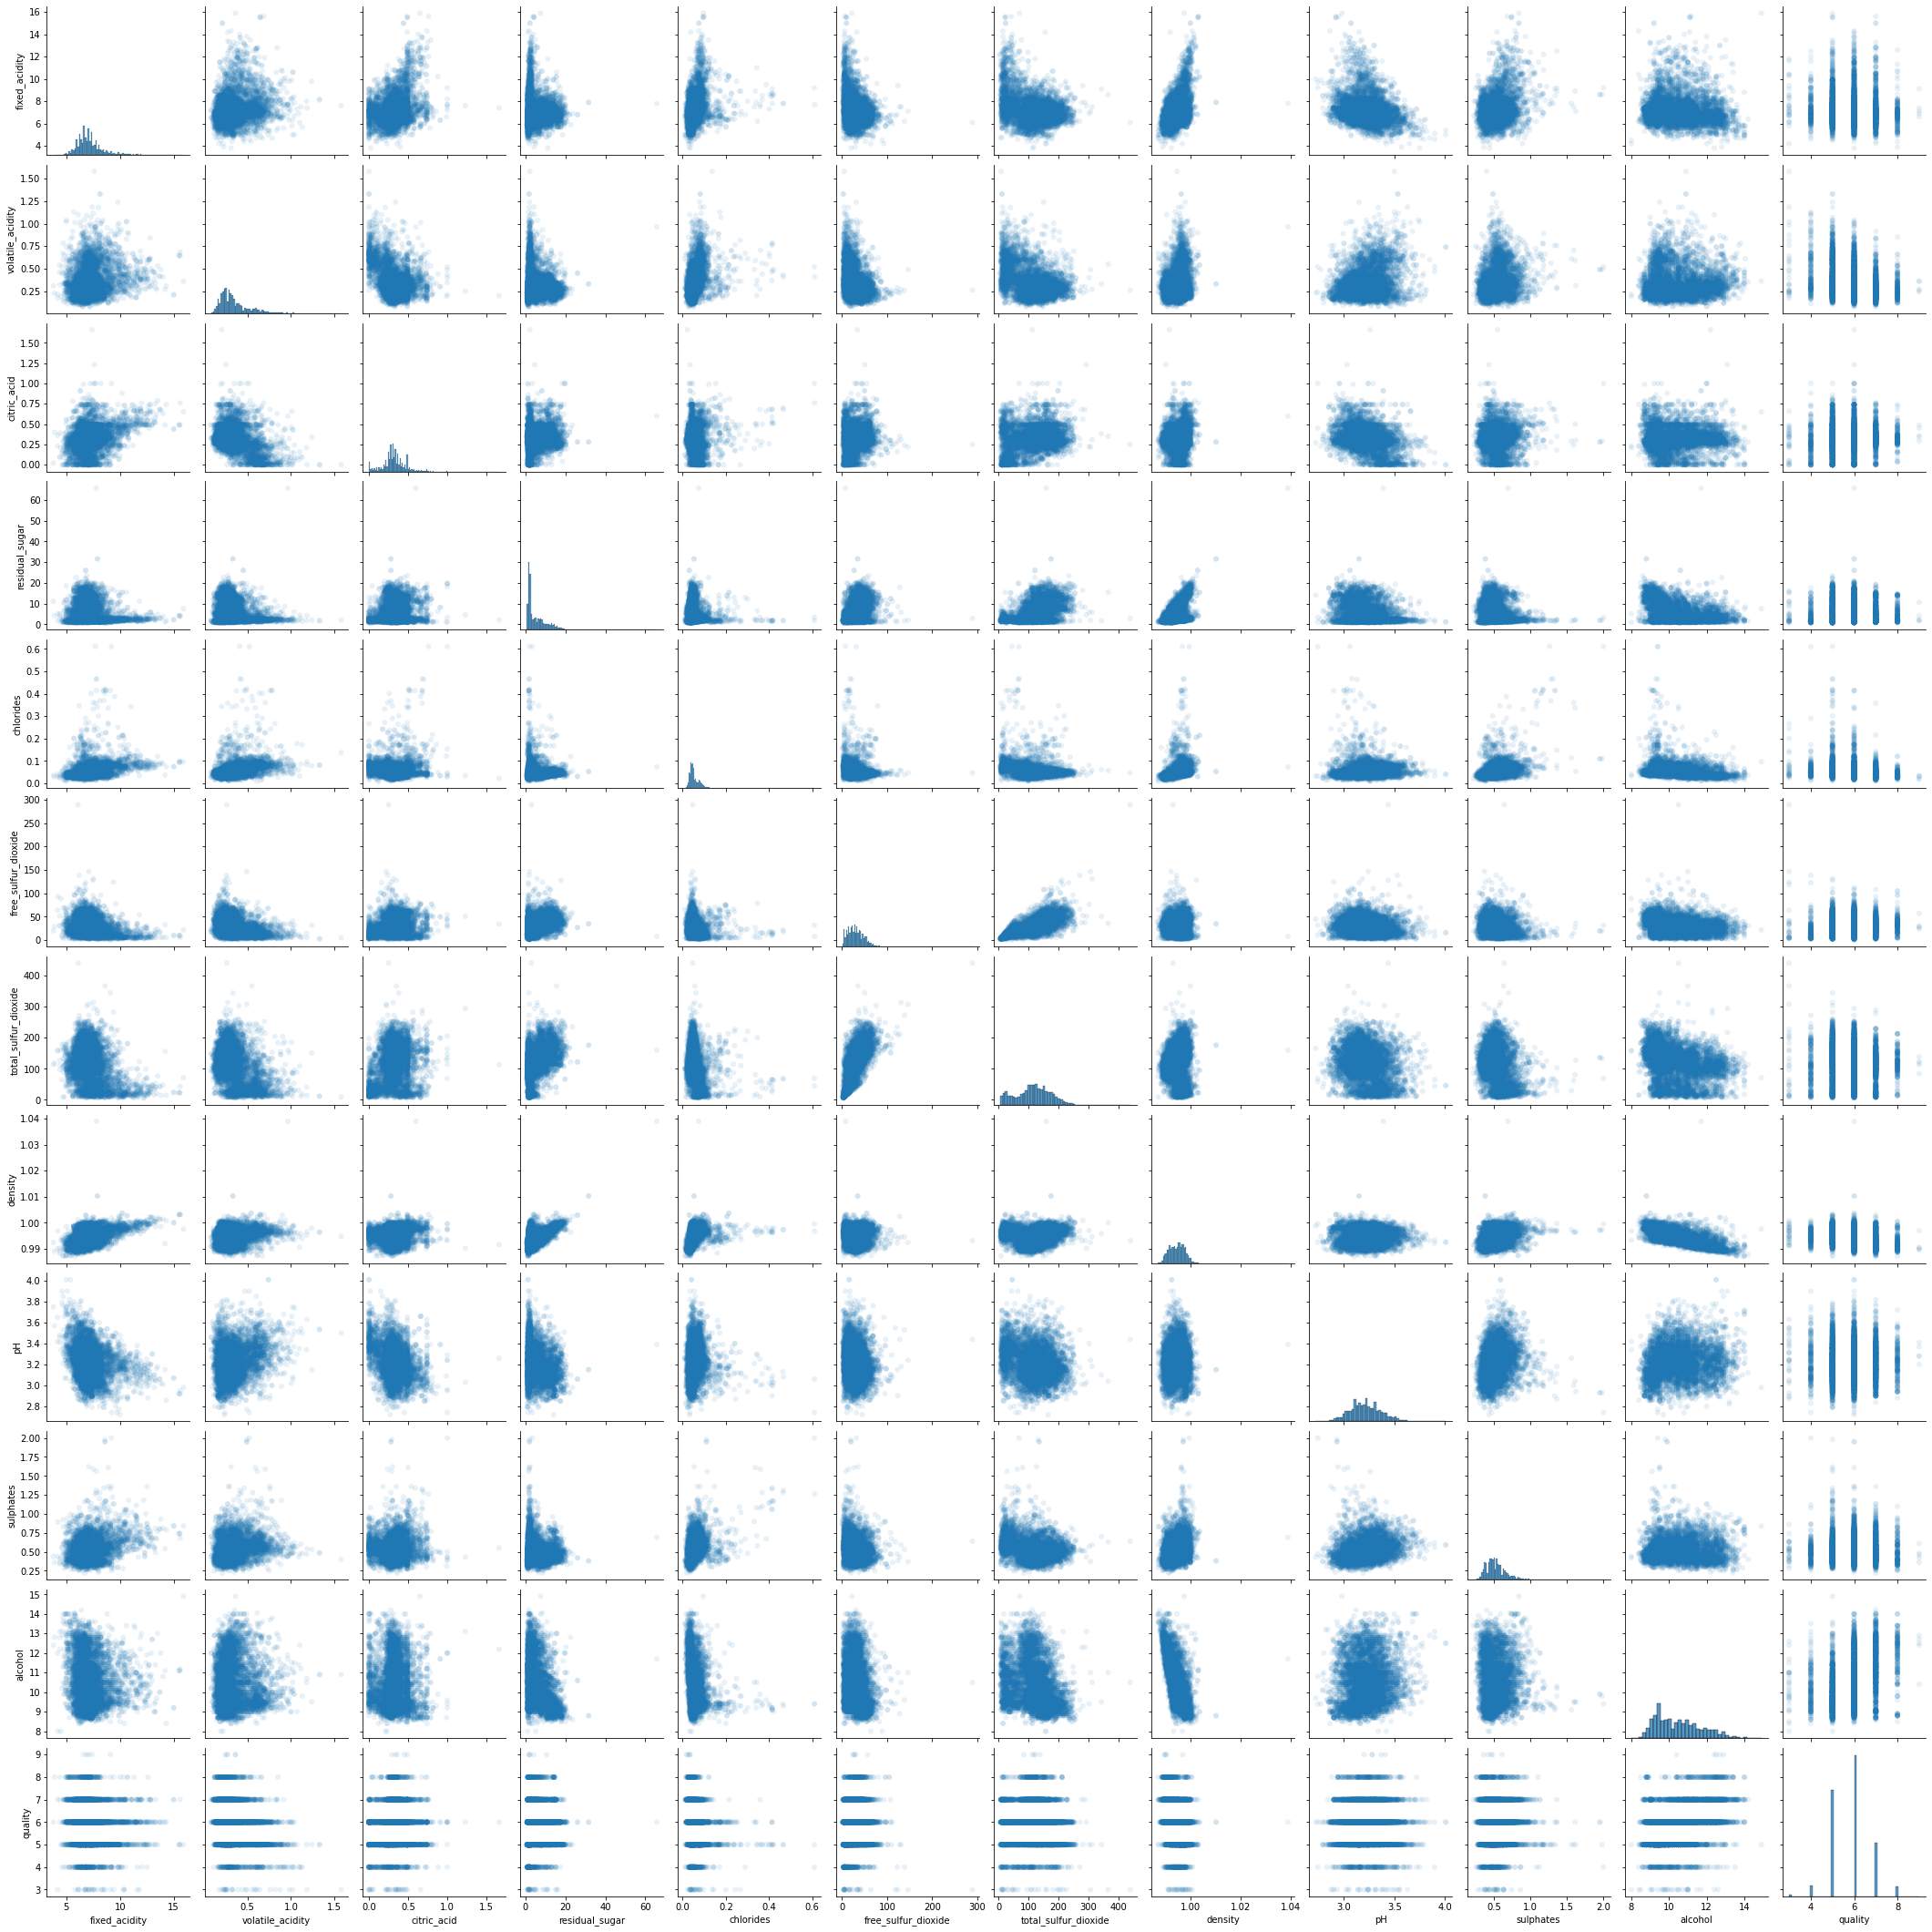

In [143]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

It can be seen that positive and negative correlations exist. It is better to find the correlation coefficients.

In [144]:
for x in range(corrmat.shape[0]):
    corrmat.iloc[x,x] = 0.0
corrmat

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,0.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,0.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,0.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,0.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,0.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,0.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,0.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,0.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,0.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,0.000000,-0.003029,0.038485


The threshold can be considered as 0.7 to include both of the correlated variables in the models. The correlation coefficient of the variables _free sulfur dioxide_ and _total sulfur dioxide_ exceeds the threshold, therefore to remove one of these variables would make sense to reduce the number of dimensions and accelerate runs.

In [145]:
data = data.drop(columns=["free_sulfur_dioxide"])

Let's examine the skewness of the features.

In [146]:
num_cols = data.columns[data.dtypes != object]
skew_limit = 0.75  # the limit to log transform
skew_vals = data[num_cols].skew()

# the skew columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0: 'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
chlorides,5.399828
sulphates,1.797270
fixed_acidity,1.723290
volatile_acidity,1.495097
residual_sugar,1.435404


These features will be log-transformed.

In [147]:
data[skew_cols.T.columns].apply(np.log1p)

,chlorides,sulphates,fixed_acidity,volatile_acidity,residual_sugar
0,0.073250,0.444686,2.128232,0.530628,1.064711
1,0.093490,0.518794,2.174752,0.631272,1.280934
2,0.088011,0.500775,2.174752,0.565314,1.193922
3,0.072321,0.457425,2.501436,0.246860,1.064711
4,0.073250,0.444686,2.128232,0.530628,1.064711
...,...,...,...,...,...
6492,0.038259,0.405465,1.974081,0.190620,0.955511
6493,0.045929,0.378436,2.028148,0.277632,2.197225
6494,0.040182,0.378436,2.014903,0.215111,0.788457
6495,0.021761,0.322083,1.871802,0.254642,0.741937


### 4. Deep Learning Models to predict _quality_

#### 4.0. Data splits, one-hot encoding and scaling

In [148]:
data["color"].value_counts(normalize=True)

white    0.753886
red      0.246114
Name: color, dtype: float64

The majority of wine colors are white. For the sake of keeping the balances for the _color_ classification, stratified shuffle split will be used. Test set will be treated as unseen in all models.

In [149]:
from sklearn.model_selection import StratifiedShuffleSplit

ss_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=999)

In [150]:
data = pd.get_dummies(data, columns=["color"], drop_first=True)

In [151]:
# for regression
X = data.drop(columns=["quality"], axis=1)
y = data["quality"]

train_idx, test_idx = next(ss_split.split(X, y))

X_train = X.loc[train_idx]
y_train = y.loc[train_idx]

X_test  = X.loc[test_idx]
y_test  = y.loc[test_idx]

In [152]:
from sklearn.preprocessing import MinMaxScaler

num_cols = data.columns[data.dtypes != object].tolist()
num_cols.remove("quality")
num_cols.remove("color_white") # one-hot-encoded categorical will not be scaled

mms = MinMaxScaler()
X_train[num_cols] = mms.fit_transform(X_train[num_cols])
X_test[num_cols] = mms.transform(X_test[num_cols])

y_train = y_train/10 # target is also scaled, the ratings are between 0 and 10
y_test = y_test/10

#### 4.1. Models

As stated before, field _quality_ will be treated as the target variable here. Even if it is an integer field, floats can be rounded to the nearest integer (if necessary). First the default regressor will be used from sklearn's RandomForestRegressor. Loss function will be MAPE (mean absolute percentage error).

In [153]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=999)

rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
mean_absolute_percentage_error(y_test, predictions)*100

8.12842572242573

Random forest model is created just to compare performances among the neural networks. 3 different neural network models will be constructed with the same optimizer (Adam). Learning rate is fixed to 0.001, somewhat slow, and batch size will be 64. Since the data has around 6500 rows, approximately 100 iterations are needed to complete 1 epoch. The models will be run for 200 epochs. Default activation function will be sigmoid, since it provides results between 0 and 1.

The models will represent these scenarios: a base neural network with one layer, a wider neural network with more neurons, and a larger neural network (a deep learning model) with several layers with different number of neurons and activation functions.

First model is the base model, it has one hidden layer with 11 neurons.

In [154]:
from keras.models  import Sequential
from keras.layers import Dense
import keras.optimizers
import random

random.seed(999)

model_1_base = Sequential()
model_1_base.add(Dense(11, input_shape = (11,), activation = 'sigmoid'))
model_1_base.add(Dense(1, activation='sigmoid'))

model_1_base.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 11)                132       
                                                                 
 dense_97 (Dense)            (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [155]:
from keras.optimizers import adam_v2

opt = adam_v2.Adam(learning_rate=0.001)
model_1_base.compile(optimizer=opt, loss=keras.losses.MeanAbsolutePercentageError(), metrics=["MAPE"])
run_hist_1 = model_1_base.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=200)

Epoch 1/200
72/72 [==============================] - 0s 2ms/step - loss: 13.3743 - MAPE: 13.3743 - val_loss: 12.1088 - val_MAPE: 12.1088
Epoch 2/200
72/72 [==============================] - 0s 938us/step - loss: 11.9815 - MAPE: 11.9815 - val_loss: 11.7985 - val_MAPE: 11.7985
Epoch 3/200
72/72 [==============================] - 0s 870us/step - loss: 11.7332 - MAPE: 11.7332 - val_loss: 11.6022 - val_MAPE: 11.6022
Epoch 4/200
72/72 [==============================] - 0s 835us/step - loss: 11.5665 - MAPE: 11.5665 - val_loss: 11.4466 - val_MAPE: 11.4466
Epoch 5/200
72/72 [==============================] - 0s 936us/step - loss: 11.4092 - MAPE: 11.4092 - val_loss: 11.2953 - val_MAPE: 11.2953
Epoch 6/200
72/72 [==============================] - 0s 867us/step - loss: 11.2810 - MAPE: 11.2810 - val_loss: 11.1784 - val_MAPE: 11.1784
Epoch 7/200
72/72 [==============================] - 0s 678us/step - loss: 11.1745 - MAPE: 11.1745 - val_loss: 11.0384 - val_MAPE: 11.0384
Epoch 8/200
72/72 [==========

In [156]:
run_hist_1.history.keys()

dict_keys(['loss', 'MAPE', 'val_loss', 'val_MAPE'])

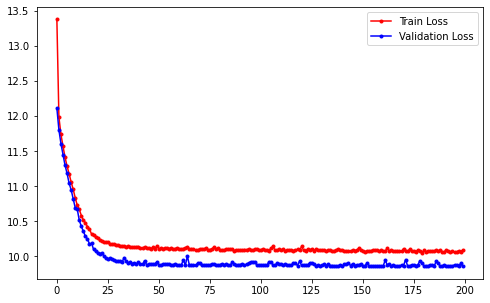

In [157]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

The validation loss seems to be lower compared to the train loss. The model may require more epochs to find the point of convergence where both loss functions are minimized.

Let's continue with the wider model that has a layer with 30 neurons.

In [158]:
model_2_wide = Sequential()
model_2_wide.add(Dense(30, input_shape = (11,), activation = 'sigmoid'))
model_2_wide.add(Dense(1, activation='sigmoid'))

model_2_wide.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 30)                360       
                                                                 
 dense_99 (Dense)            (None, 1)                 31        
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [159]:
model_2_wide.compile(optimizer=opt, loss=keras.losses.MeanAbsolutePercentageError(), metrics=["MAPE"])
run_hist_2= model_2_wide.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=200)

Epoch 1/200
72/72 [==============================] - 1s 3ms/step - loss: 13.8333 - MAPE: 13.8333 - val_loss: 11.3007 - val_MAPE: 11.3007
Epoch 2/200
72/72 [==============================] - 0s 2ms/step - loss: 11.1901 - MAPE: 11.1901 - val_loss: 10.9912 - val_MAPE: 10.9912
Epoch 3/200
72/72 [==============================] - 0s 4ms/step - loss: 10.9291 - MAPE: 10.9291 - val_loss: 11.0398 - val_MAPE: 11.0398
Epoch 4/200
72/72 [==============================] - 0s 3ms/step - loss: 10.8244 - MAPE: 10.8244 - val_loss: 10.5423 - val_MAPE: 10.5423
Epoch 5/200
72/72 [==============================] - 0s 3ms/step - loss: 10.6071 - MAPE: 10.6071 - val_loss: 10.4345 - val_MAPE: 10.4345
Epoch 6/200
72/72 [==============================] - 0s 3ms/step - loss: 10.4922 - MAPE: 10.4922 - val_loss: 10.3397 - val_MAPE: 10.3397
Epoch 7/200
72/72 [==============================] - 0s 3ms/step - loss: 10.4166 - MAPE: 10.4166 - val_loss: 10.2008 - val_MAPE: 10.2008
Epoch 8/200
72/72 [======================

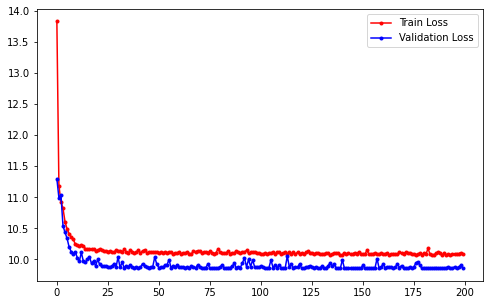

In [160]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

The results are quite similar, this may be pointing out that parameter tuning or adding more layers is needed.

Let's now construct the larger model

In [161]:
model_3_large = Sequential()
model_3_large.add(Dense(11, input_shape = (11,), activation = 'sigmoid'))
model_3_large.add(Dense(20, activation = 'relu'))
model_3_large.add(Dense(5, activation = 'relu'))
model_3_large.add(Dense(1, activation='sigmoid'))

model_3_large.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 11)                132       
                                                                 
 dense_101 (Dense)           (None, 20)                240       
                                                                 
 dense_102 (Dense)           (None, 5)                 105       
                                                                 
 dense_103 (Dense)           (None, 1)                 6         
                                                                 
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________


In [162]:
model_3_large.compile(optimizer=opt, loss=keras.losses.MeanAbsolutePercentageError(), metrics=["MAPE"])
run_hist_3= model_3_large.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=200)

Epoch 1/200
72/72 [==============================] - 1s 4ms/step - loss: 12.2022 - MAPE: 12.2022 - val_loss: 11.8298 - val_MAPE: 11.8298
Epoch 2/200
72/72 [==============================] - 0s 3ms/step - loss: 11.7987 - MAPE: 11.7987 - val_loss: 11.6780 - val_MAPE: 11.6780
Epoch 3/200
72/72 [==============================] - 0s 3ms/step - loss: 11.6345 - MAPE: 11.6345 - val_loss: 11.5365 - val_MAPE: 11.5365
Epoch 4/200
72/72 [==============================] - 0s 3ms/step - loss: 11.5000 - MAPE: 11.5000 - val_loss: 11.5419 - val_MAPE: 11.5419
Epoch 5/200
72/72 [==============================] - 0s 3ms/step - loss: 11.2995 - MAPE: 11.2995 - val_loss: 11.0894 - val_MAPE: 11.0894
Epoch 6/200
72/72 [==============================] - 0s 2ms/step - loss: 10.9913 - MAPE: 10.9913 - val_loss: 10.6973 - val_MAPE: 10.6973
Epoch 7/200
72/72 [==============================] - 0s 2ms/step - loss: 10.6670 - MAPE: 10.6670 - val_loss: 10.5397 - val_MAPE: 10.5397
Epoch 8/200
72/72 [======================

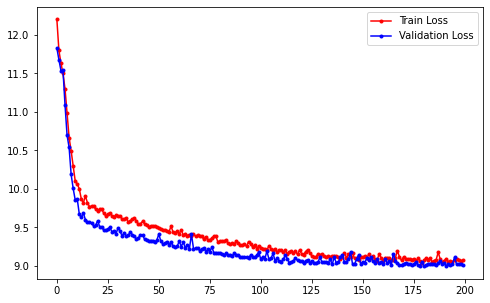

In [163]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

The results are better than the first 2 models. However, the best deep learning model so far provides a validation loss as approximately 9, which is still outperformed by the default random forest regression. To get better results, different parameters and additional layers can be tried and added to the model. Let's try to create a more complex model.

In [164]:
model_4_complex = Sequential()
model_4_complex.add(Dense(11, input_shape=(11,), activation='selu'))
model_4_complex.add(Dense(20, activation='relu'))
model_4_complex.add(Dense(15, activation='selu'))
model_4_complex.add(Dense(15, activation='relu'))
model_4_complex.add(Dense(5, activation='relu'))
model_4_complex.add(Dense(1, activation='selu'))

model_4_complex.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 11)                132       
                                                                 
 dense_105 (Dense)           (None, 20)                240       
                                                                 
 dense_106 (Dense)           (None, 15)                315       
                                                                 
 dense_107 (Dense)           (None, 15)                240       
                                                                 
 dense_108 (Dense)           (None, 5)                 80        
                                                                 
 dense_109 (Dense)           (None, 1)                 6         
                                                                 
Total params: 1,013
Trainable params: 1,013
Non-train

In [165]:
model_4_complex.compile(optimizer=opt, loss=keras.losses.MeanAbsolutePercentageError(), metrics=["MAPE"])
run_hist_4= model_4_complex.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=200)

Epoch 1/200
72/72 [==============================] - 1s 5ms/step - loss: 28.4080 - MAPE: 28.4080 - val_loss: 10.7171 - val_MAPE: 10.7171
Epoch 2/200
72/72 [==============================] - 0s 3ms/step - loss: 10.6975 - MAPE: 10.6975 - val_loss: 10.8118 - val_MAPE: 10.8118
Epoch 3/200
72/72 [==============================] - 0s 3ms/step - loss: 10.5945 - MAPE: 10.5945 - val_loss: 10.0938 - val_MAPE: 10.0938
Epoch 4/200
72/72 [==============================] - 0s 4ms/step - loss: 10.2854 - MAPE: 10.2854 - val_loss: 10.0114 - val_MAPE: 10.0114
Epoch 5/200
72/72 [==============================] - 0s 3ms/step - loss: 10.2595 - MAPE: 10.2595 - val_loss: 10.0401 - val_MAPE: 10.0401
Epoch 6/200
72/72 [==============================] - 0s 3ms/step - loss: 10.2387 - MAPE: 10.2387 - val_loss: 10.5522 - val_MAPE: 10.5522
Epoch 7/200
72/72 [==============================] - 0s 4ms/step - loss: 10.1699 - MAPE: 10.1699 - val_loss: 9.8699 - val_MAPE: 9.8699
Epoch 8/200
72/72 [========================

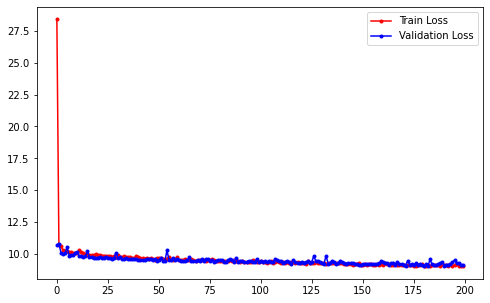

In [166]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(run_hist_4.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_4.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Making the deep learning model more complex can result in overfitting. That might be the case with the complex model, as train loss continues to decrease, at some point validation loss remains above the train loss. Thus, the best performing deep learning model is the large model. The best model for predicting the wine quality is random forest according to MAPE metric.

### 5. Deep learning models to predict _color_

#### 5.0. Data splits and scaling

In [167]:
X = data.drop(columns=["color_white"], axis=1)
y = data["color_white"]

train_idx, test_idx = next(ss_split.split(X, y))

X_train = X.loc[train_idx]
y_train = y.loc[train_idx]

X_test  = X.loc[test_idx]
y_test  = y.loc[test_idx]

In [168]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

#### 5.1. Models

Now, the classification of wine color will be made with deep learning models by following a similar structure as the previous section. First, the default random forest classifier from sklearn is built.

In [169]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=999)

rf.fit(X_train, y_train)
pred = rf.predict(X_test)
prob = rf.predict_proba(X_test)
print(f"Accuracy score: {accuracy_score(y_test, pred)}")
print(f"ROC-AUC score: {roc_auc_score(y_test, prob[:,1])}")

Accuracy score: 0.9969230769230769
ROC-AUC score: 0.9985359977324262


Random forest classifier gave almost perfect results. Let's now build the base, wide and large neural networks.

In [170]:
model_1_base = Sequential()
model_1_base.add(Dense(11, input_shape = (11,), activation = 'sigmoid'))
model_1_base.add(Dense(1, activation='sigmoid'))

model_1_base.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 11)                132       
                                                                 
 dense_111 (Dense)           (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [171]:
opt = adam_v2.Adam(learning_rate=0.001)
model_1_base.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1_base.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=200)

Epoch 1/200
72/72 [==============================] - 1s 5ms/step - loss: 0.5667 - accuracy: 0.7539 - val_loss: 0.5603 - val_accuracy: 0.7538
Epoch 2/200
72/72 [==============================] - 0s 4ms/step - loss: 0.5563 - accuracy: 0.7539 - val_loss: 0.5503 - val_accuracy: 0.7538
Epoch 3/200
72/72 [==============================] - 0s 4ms/step - loss: 0.5460 - accuracy: 0.7539 - val_loss: 0.5400 - val_accuracy: 0.7538
Epoch 4/200
72/72 [==============================] - 0s 3ms/step - loss: 0.5355 - accuracy: 0.7539 - val_loss: 0.5291 - val_accuracy: 0.7538
Epoch 5/200
72/72 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.7539 - val_loss: 0.5172 - val_accuracy: 0.7538
Epoch 6/200
72/72 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 0.7539 - val_loss: 0.5040 - val_accuracy: 0.7538
Epoch 7/200
72/72 [==============================] - 0s 4ms/step - loss: 0.4975 - accuracy: 0.7539 - val_loss: 0.4885 - val_accuracy: 0.7538
Epoch 8/200
7

Accuracy score: 0.9917948717948718
ROC-AUC score: 0.997219387755102


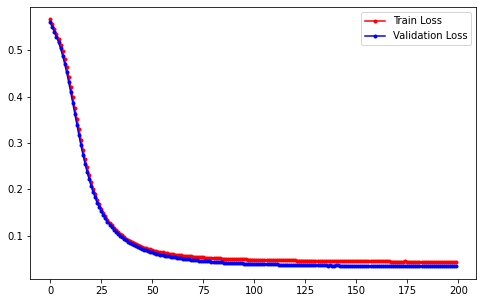

In [172]:
y_prob_1 = model_1_base.predict(X_test)
y_pred_1 = (y_prob_1 > 0.5).astype("int32")

print(f"Accuracy score: {accuracy_score(y_test, y_pred_1)}")
print(f"ROC-AUC score: {roc_auc_score(y_test, y_prob_1)}")

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

The base model provides results as good as the random forest classifier model. Even a single-layer neural network has provided very good results. Since the results are good enough, there is no need to extend the models with more layers for now. However, let's create a more complex neural network model to see if it can perform as well as the previous models.

In [173]:
model_2_complex = Sequential()
model_2_complex.add(Dense(11, input_shape=(11,), activation='selu'))
model_2_complex.add(Dense(20, activation='relu'))
model_2_complex.add(Dense(15, activation='selu'))
model_2_complex.add(Dense(15, activation='sigmoid'))
model_2_complex.add(Dense(5, activation='relu'))
model_2_complex.add(Dense(1, activation='sigmoid'))

model_2_complex.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 11)                132       
                                                                 
 dense_113 (Dense)           (None, 20)                240       
                                                                 
 dense_114 (Dense)           (None, 15)                315       
                                                                 
 dense_115 (Dense)           (None, 15)                240       
                                                                 
 dense_116 (Dense)           (None, 5)                 80        
                                                                 
 dense_117 (Dense)           (None, 1)                 6         
                                                                 
Total params: 1,013
Trainable params: 1,013
Non-train

In [174]:
model_2_complex.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2_complex.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=200)

Epoch 1/200
72/72 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9226 - val_loss: 0.0670 - val_accuracy: 0.9815
Epoch 2/200
72/72 [==============================] - 0s 1ms/step - loss: 0.0592 - accuracy: 0.9844 - val_loss: 0.0466 - val_accuracy: 0.9856
Epoch 3/200
72/72 [==============================] - 0s 894us/step - loss: 0.0465 - accuracy: 0.9872 - val_loss: 0.0366 - val_accuracy: 0.9913
Epoch 4/200
72/72 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9879 - val_loss: 0.0342 - val_accuracy: 0.9908
Epoch 5/200
72/72 [==============================] - 0s 802us/step - loss: 0.0496 - accuracy: 0.9859 - val_loss: 0.0325 - val_accuracy: 0.9913
Epoch 6/200
72/72 [==============================] - 0s 963us/step - loss: 0.0369 - accuracy: 0.9914 - val_loss: 0.0329 - val_accuracy: 0.9913
Epoch 7/200
72/72 [==============================] - 0s 902us/step - loss: 0.0380 - accuracy: 0.9894 - val_loss: 0.0327 - val_accuracy: 0.9913
Epoch

Accuracy score: 0.9933333333333333
ROC-AUC score: 0.9976190476190476


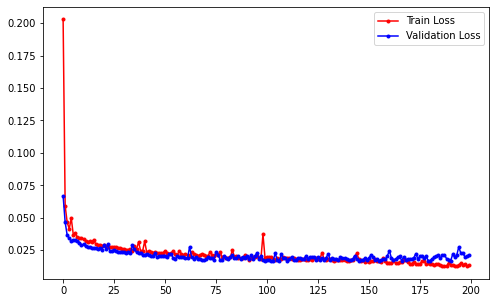

In [175]:
y_prob_1 = model_2_complex.predict(X_test)
y_pred_1 = (y_prob_1 > 0.5).astype("int32")

print(f"Accuracy score: {accuracy_score(y_test, y_pred_1)}")
print(f"ROC-AUC score: {roc_auc_score(y_test, y_prob_1)}")

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

Text(0.5, 1.0, 'Accuracy over iterations')

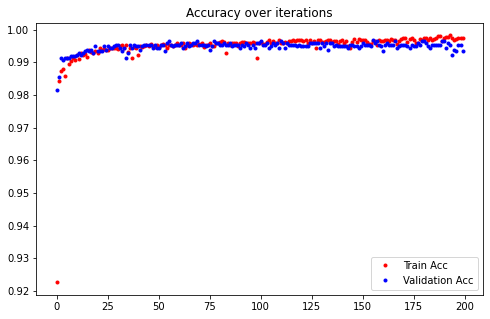

In [176]:
n = len(run_hist_2.history["loss"])
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

The complex model seems overfitted after around 90 epochs, since the validation loss cannot be improved further. However, according to the evaluation metrics, all models performed well.

### 6. Findings and suggestions

For regression, the data is more suitable for machine learning models since there are no extreme number of rows to process. Thus, the default random forest regressor outperformed the deep learning models. For classification, the models have shown similar and good-enough results, any one of these models can be used as the final model.

Neural networks have lots of possibilities in terms of hyperparameters and layer configurations, and this situation makes it complicated to construct well-performing models. Limited configurations are used in this work, however, the results are found to be satisfactory. To get the best out of these deep learning models, additional data would be definitely useful, as it is known that these models perform well with big data.

_by Sude Kocaçiftçi Bayraktar_